In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
data = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
features = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
            'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(data, names=features, na_values='?',comment='\t', sep=' ', skipinitialspace=True)

In [61]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


### Predict MPG(miles per gallon)

In [62]:
len(dataset)

398

In [63]:
dataset = dataset.dropna(axis=0)
dataset.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
173,24.0,4,119.0,97.0,2545.0,17.0,75,3
233,29.0,4,97.0,78.0,1940.0,14.5,77,2
201,18.5,6,250.0,110.0,3645.0,16.2,76,1
305,28.4,4,151.0,90.0,2670.0,16.0,79,1
27,11.0,8,318.0,210.0,4382.0,13.5,70,1
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
44,13.0,8,400.0,175.0,5140.0,12.0,71,1
81,28.0,4,97.0,92.0,2288.0,17.0,72,3
57,24.0,4,113.0,95.0,2278.0,15.5,72,3
239,30.0,4,97.0,67.0,1985.0,16.4,77,3


In [64]:
origin = dataset.pop('Origin') # get column Origin 
origin

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [65]:
# convert categorical 'Origin' data into one-hot data
dataset['USA'] = (origin == 1)*1 # *1 --> True -> 1 , False -> 0
dataset['Europe'] = (origin == 2)*1
dataset['Japan'] = (origin == 3)*1

dataset.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
373,24.0,4,140.0,92.0,2865.0,16.4,82,1,0,0
62,13.0,8,350.0,165.0,4274.0,12.0,72,1,0,0
328,30.0,4,146.0,67.0,3250.0,21.8,80,0,1,0
28,9.0,8,304.0,193.0,4732.0,18.5,70,1,0,0
383,38.0,4,91.0,67.0,1965.0,15.0,82,0,0,1
364,26.6,8,350.0,105.0,3725.0,19.0,81,1,0,0
226,20.5,6,231.0,105.0,3425.0,16.9,77,1,0,0
188,16.0,8,318.0,150.0,4190.0,13.0,76,1,0,0
30,28.0,4,140.0,90.0,2264.0,15.5,71,1,0,0
283,20.2,6,232.0,90.0,3265.0,18.2,79,1,0,0


### Spliting data

In [67]:
train_data = dataset.sample(frac=.8, random_state=42) # 80 percent of data to train set
test_data = dataset.drop(train_data.index)

print(dataset.shape, train_data.shape, test_data.shape)

(392, 10) (314, 10) (78, 10)


In [114]:
train_features = train_data.copy()
test_features = test_data.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

train_features.shape, train_labels.shape

((314, 9), (314,))

### Normalize

In [97]:
from sklearn import preprocessing

In [119]:
train_features = preprocessing.normalize(train_features)
test_features = preprocessing.normalize(test_features)

In [127]:
test_features[0]

array([2.15406844e-03, 9.42404941e-02, 4.44276615e-02, 9.94371842e-01,
       3.09647338e-03, 1.88480988e-02, 2.69258555e-04, 0.00000000e+00,
       0.00000000e+00])

In [128]:
train_features[0].shape

(9,)

### Modeling

In [149]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(9,)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,)
])

model.compile(loss=tf.keras.losses.MAE,optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

history = model.fit(train_features,train_labels,epochs=200,validation_split=.2)


Epoch 1/200
8/8 [==============================] - 0s 20ms/step - loss: 23.4219 - val_loss: 22.1348
Epoch 2/200
8/8 [==============================] - 0s 6ms/step - loss: 23.3887 - val_loss: 22.1016
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 23.3554 - val_loss: 22.0684
Epoch 4/200
8/8 [==============================] - 0s 6ms/step - loss: 23.3223 - val_loss: 22.0354
Epoch 5/200
8/8 [==============================] - 0s 6ms/step - loss: 23.2893 - val_loss: 22.0024
Epoch 6/200
8/8 [==============================] - 0s 10ms/step - loss: 23.2567 - val_loss: 21.9701
Epoch 7/200
8/8 [==============================] - 0s 9ms/step - loss: 23.2243 - val_loss: 21.9376
Epoch 8/200
8/8 [==============================] - 0s 10ms/step - loss: 23.1917 - val_loss: 21.9050
Epoch 9/200
8/8 [==============================] - 0s 10ms/step - loss: 23.1595 - val_loss: 21.8734
Epoch 10/200
8/8 [==============================] - 0s 10ms/step - loss: 23.1287 - val_loss: 21.8435
Epoc

<AxesSubplot:xlabel='epoch'>

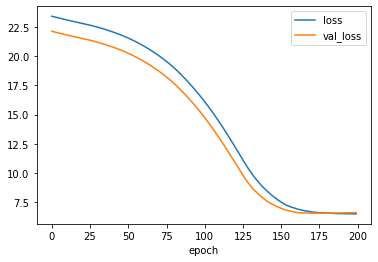

In [150]:
pd.DataFrame(history.history).plot(xlabel='epoch')

In [151]:
model.evaluate(test_features,test_labels)

3/3 [==============================] - 0s 0s/step - loss: 6.7910


6.791036128997803

### Find ideal learning rate

In [160]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(9,)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,)
])

model_2.compile(loss=tf.keras.losses.MAE,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

lr_sch =  tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_2 = model_2.fit(train_features,train_labels,epochs=100,validation_split=.2,callbacks=[lr_sch])

Epoch 1/100
8/8 [==============================] - 0s 20ms/step - loss: 23.4219 - val_loss: 22.1348 - lr: 1.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 23.3870 - val_loss: 22.0975 - lr: 1.1220e-04
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 23.3477 - val_loss: 22.0559 - lr: 1.2589e-04
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 23.3040 - val_loss: 22.0093 - lr: 1.4125e-04
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 23.2554 - val_loss: 21.9581 - lr: 1.5849e-04
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 23.2014 - val_loss: 21.9003 - lr: 1.7783e-04
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 23.1421 - val_loss: 21.8397 - lr: 1.9953e-04
Epoch 8/100
8/8 [==============================] - 0s 11ms/step - loss: 23.0800 - val_loss: 21.7745 - lr: 2.2387e-04
Epoch 9/100
8/8 [==============================] - 0s 10ms/step - los

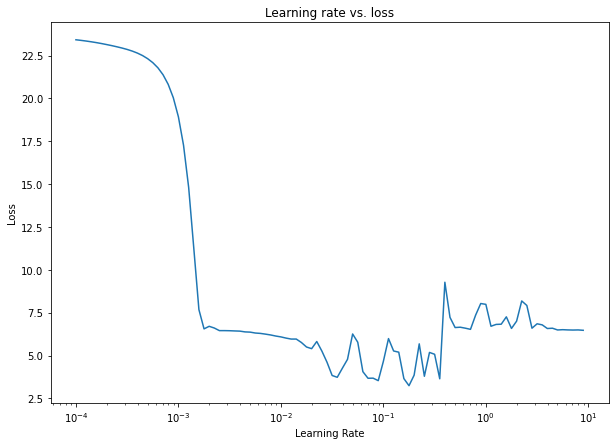

In [161]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_2.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

about 0.0007 - 0.002

In [208]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(9,)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,)
])

model_3.compile(loss=tf.keras.losses.MAE,optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))


history_3 = model_3.fit(train_features,train_labels,epochs=300,validation_split=.2,verbose=0)

<AxesSubplot:xlabel='epoch'>

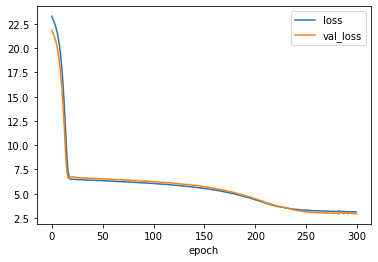

In [209]:
pd.DataFrame(history_3.history).plot(xlabel='epoch')

In [210]:
model_3.evaluate(test_features,test_labels)

3/3 [==============================] - 0s 4ms/step - loss: 2.9821


2.982109546661377

In [211]:
y_pred = model_3.predict(test_features)
y_pred[:10], test_labels[:10]

(array([[14.161891],
        [ 8.741245],
        [26.777657],
        [26.616936],
        [17.649902],
        [15.331741],
        [25.066086],
        [25.741234],
        [30.79302 ],
        [32.53733 ]], dtype=float32),
 1     15.0
 13    14.0
 20    25.0
 21    24.0
 35    17.0
 44    13.0
 49    23.0
 50    28.0
 51    30.0
 53    31.0
 Name: MPG, dtype: float64)

In [212]:
def ShowResult(X_test,y_test,y_pred,title):
    plt.figure(figsize=(8,5))
    plt.scatter(X_test, y_pred, c='r', label = 'y_predict')
    plt.scatter(X_test, y_test, c='b', label = 'y_test')
    plt.title(title)
    plt.legend();

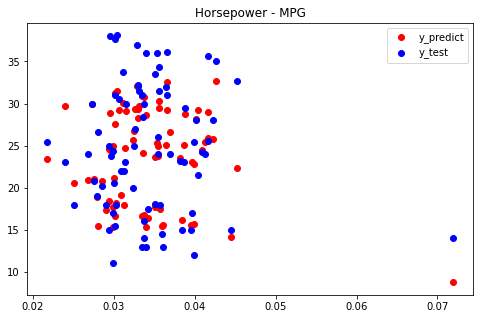

In [213]:
ShowResult(test_features[:,2],test_labels,y_pred,'Horsepower - MPG')